  İLAÇ SATIŞ ANALİZİ
  

Pazara Genel Bakış


İlaç Pazarının 2027 yılına kadar 23 milyar dolara ulaşacağı tahmin edilmektedir.
Bu büyüme, artan prevalans da dahil olmak üzere çeşitli faktörlerden kaynaklanmaktadır
kronik hastalıklar, artan sağlık harcamaları ve büyüyen yaşlı nüfus.
Türkiye, hem yerli hem de yabancı ilaç üreticileri ile köklü bir ilaç endüstrisine sahiptir.
uluslararası şirketler pazarda faaliyet göstermektedir. Ülke, sahip olduğu
Güçlü üretim kapasiteleri ve ihracatın önemli bir kısmı
farmasötik ürünler diğer ülkeler.
Hükümet, Türkiye'deki pi-ıarn-zötik se:torunda önemli bir rol oynamaktadır.
üzerinde doğrudan etkisi olan ilaçların fiyatlandırılmasını ve geri ödemesini düzenler.
piyasa dinarnjcs. Hükümet, piyasayı canlandırmak için çeşitli tedbirler almıştır.
ABD jenerik ilaçlarını tanıtmak ve sağlık maliyetlerini azaltmak.
Türkiye'de yenilikçi piarrnzceutical ürünlere yönelik artan bir talep var,
tıbbi teknolojideki ilerlemeler ve artan iş hacmi tarafından yönlendirilmektedir.



In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

import xgboost as xgb
from xgboost import plot_importance, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



---



In [19]:
df_monthly = pd.read_csv("drive/MyDrive/kaggle/input/salesmonthly.csv")
df_monthly.head(5)

,datum,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06
0,2014-01-31,127.69,99.090,152.100,878.030,354.0,50.0,112.0,48.2
1,2014-02-28,133.32,126.050,177.000,1001.900,347.0,31.0,122.0,36.2
2,2014-03-31,137.44,92.950,147.655,779.275,232.0,20.0,112.0,85.4
3,2014-04-30,113.10,89.475,130.900,698.500,209.0,18.0,97.0,73.7
4,2014-05-31,101.79,119.933,132.100,628.780,270.0,23.0,107.0,123.7


In [20]:
df_monthly.describe()

,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06
count,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000
mean,149.992000,116.514286,115.020843,892.542071,262.118571,17.842857,167.675000,86.662571
std,31.485325,27.889336,31.245899,338.843908,85.060930,8.481242,81.767979,45.859336
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,137.490000,103.518250,94.375000,648.187500,223.750000,12.000000,112.000000,49.875000
50%,154.635000,114.840000,117.225000,865.824500,250.300000,18.000000,160.000000,74.100000
75%,169.000000,128.359750,133.837500,1061.580000,293.650000,23.000000,218.250000,119.807500
max,211.130000,222.351000,191.600000,1856.815000,492.000000,50.000000,386.000000,213.040000


In [21]:
df_monthly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   datum   70 non-null     object 
 1   M01AB   70 non-null     float64
 2   M01AE   70 non-null     float64
 3   N02BA   70 non-null     float64
 4   N02BE   70 non-null     float64
 5   N05B    70 non-null     float64
 6   N05C    70 non-null     float64
 7   R03     70 non-null     float64
 8   R06     70 non-null     float64
dtypes: float64(8), object(1)
memory usage: 5.0+ KB


In [22]:
for col in df_monthly.columns:
    df_monthly = df_monthly[df_monthly[col] != 0]
df_monthly = df_monthly.reset_index(drop=True)

In [23]:
df_monthly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   datum   69 non-null     object 
 1   M01AB   69 non-null     float64
 2   M01AE   69 non-null     float64
 3   N02BA   69 non-null     float64
 4   N02BE   69 non-null     float64
 5   N05B    69 non-null     float64
 6   N05C    69 non-null     float64
 7   R03     69 non-null     float64
 8   R06     69 non-null     float64
dtypes: float64(8), object(1)
memory usage: 5.0+ KB


In [24]:
df_monthly.describe()

,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06
count,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000
mean,152.165797,118.202899,116.687812,905.477464,265.902899,18.101449,170.105072,87.918551
std,25.889420,24.222290,28.165372,323.448143,79.526993,8.260724,79.780194,44.966193
min,44.370000,37.300000,20.650000,295.150000,86.000000,5.000000,37.000000,11.130000
25%,137.640000,103.522000,97.000000,649.800000,226.000000,12.000000,112.000000,51.000000
50%,154.750000,114.961000,117.750000,867.899000,250.600000,18.000000,161.000000,74.500000
75%,169.320000,128.402000,133.850000,1062.686000,295.200000,23.000000,219.000000,120.800000
max,211.130000,222.351000,191.600000,1856.815000,492.000000,50.000000,386.000000,213.040000


In [25]:
aylar = ["Ocak", "Şubat", "Mart", "Nisan", "Mayıs", "Haziran", "Temmuz", "Ağustos", "Eylül", "Ekim", "Kasım", "Aralık"]
df_monthly["Ay"] = 0
df_monthly["Yıl"] = "0"
for i, satir in enumerate(df_monthly["datum"]):
    df_monthly["Ay"][i] = aylar[int(satir.split("-")[1]) - 1]
    df_monthly["Yıl"][i] = str(satir.split("-")[0])
df_monthly.head()

<ipython-input-25-1374cde292e8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_monthly["Ay"][i] = aylar[int(satir.split("-")[1]) - 1]
<ipython-input-25-1374cde292e8>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_monthly["Yıl"][i] = str(satir.split("-")[0])
<ipython-input-25-1374cde292e8>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_monthly["Yıl"][i] = str(satir.split("-")[0])
<ipython-input-25-1374cde292e8>:6: Setting

,datum,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,Ay,Yıl
0,2014-01-31,127.69,99.090,152.100,878.030,354.0,50.0,112.0,48.2,Ocak,2014
1,2014-02-28,133.32,126.050,177.000,1001.900,347.0,31.0,122.0,36.2,Şubat,2014
2,2014-03-31,137.44,92.950,147.655,779.275,232.0,20.0,112.0,85.4,Mart,2014
3,2014-04-30,113.10,89.475,130.900,698.500,209.0,18.0,97.0,73.7,Nisan,2014
4,2014-05-31,101.79,119.933,132.100,628.780,270.0,23.0,107.0,123.7,Mayıs,2014


In [26]:
df_monthly.drop(["datum"], inplace=True, axis=1)
df_monthly.head()

,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,Ay,Yıl
0,127.69,99.090,152.100,878.030,354.0,50.0,112.0,48.2,Ocak,2014
1,133.32,126.050,177.000,1001.900,347.0,31.0,122.0,36.2,Şubat,2014
2,137.44,92.950,147.655,779.275,232.0,20.0,112.0,85.4,Mart,2014
3,113.10,89.475,130.900,698.500,209.0,18.0,97.0,73.7,Nisan,2014
4,101.79,119.933,132.100,628.780,270.0,23.0,107.0,123.7,Mayıs,2014


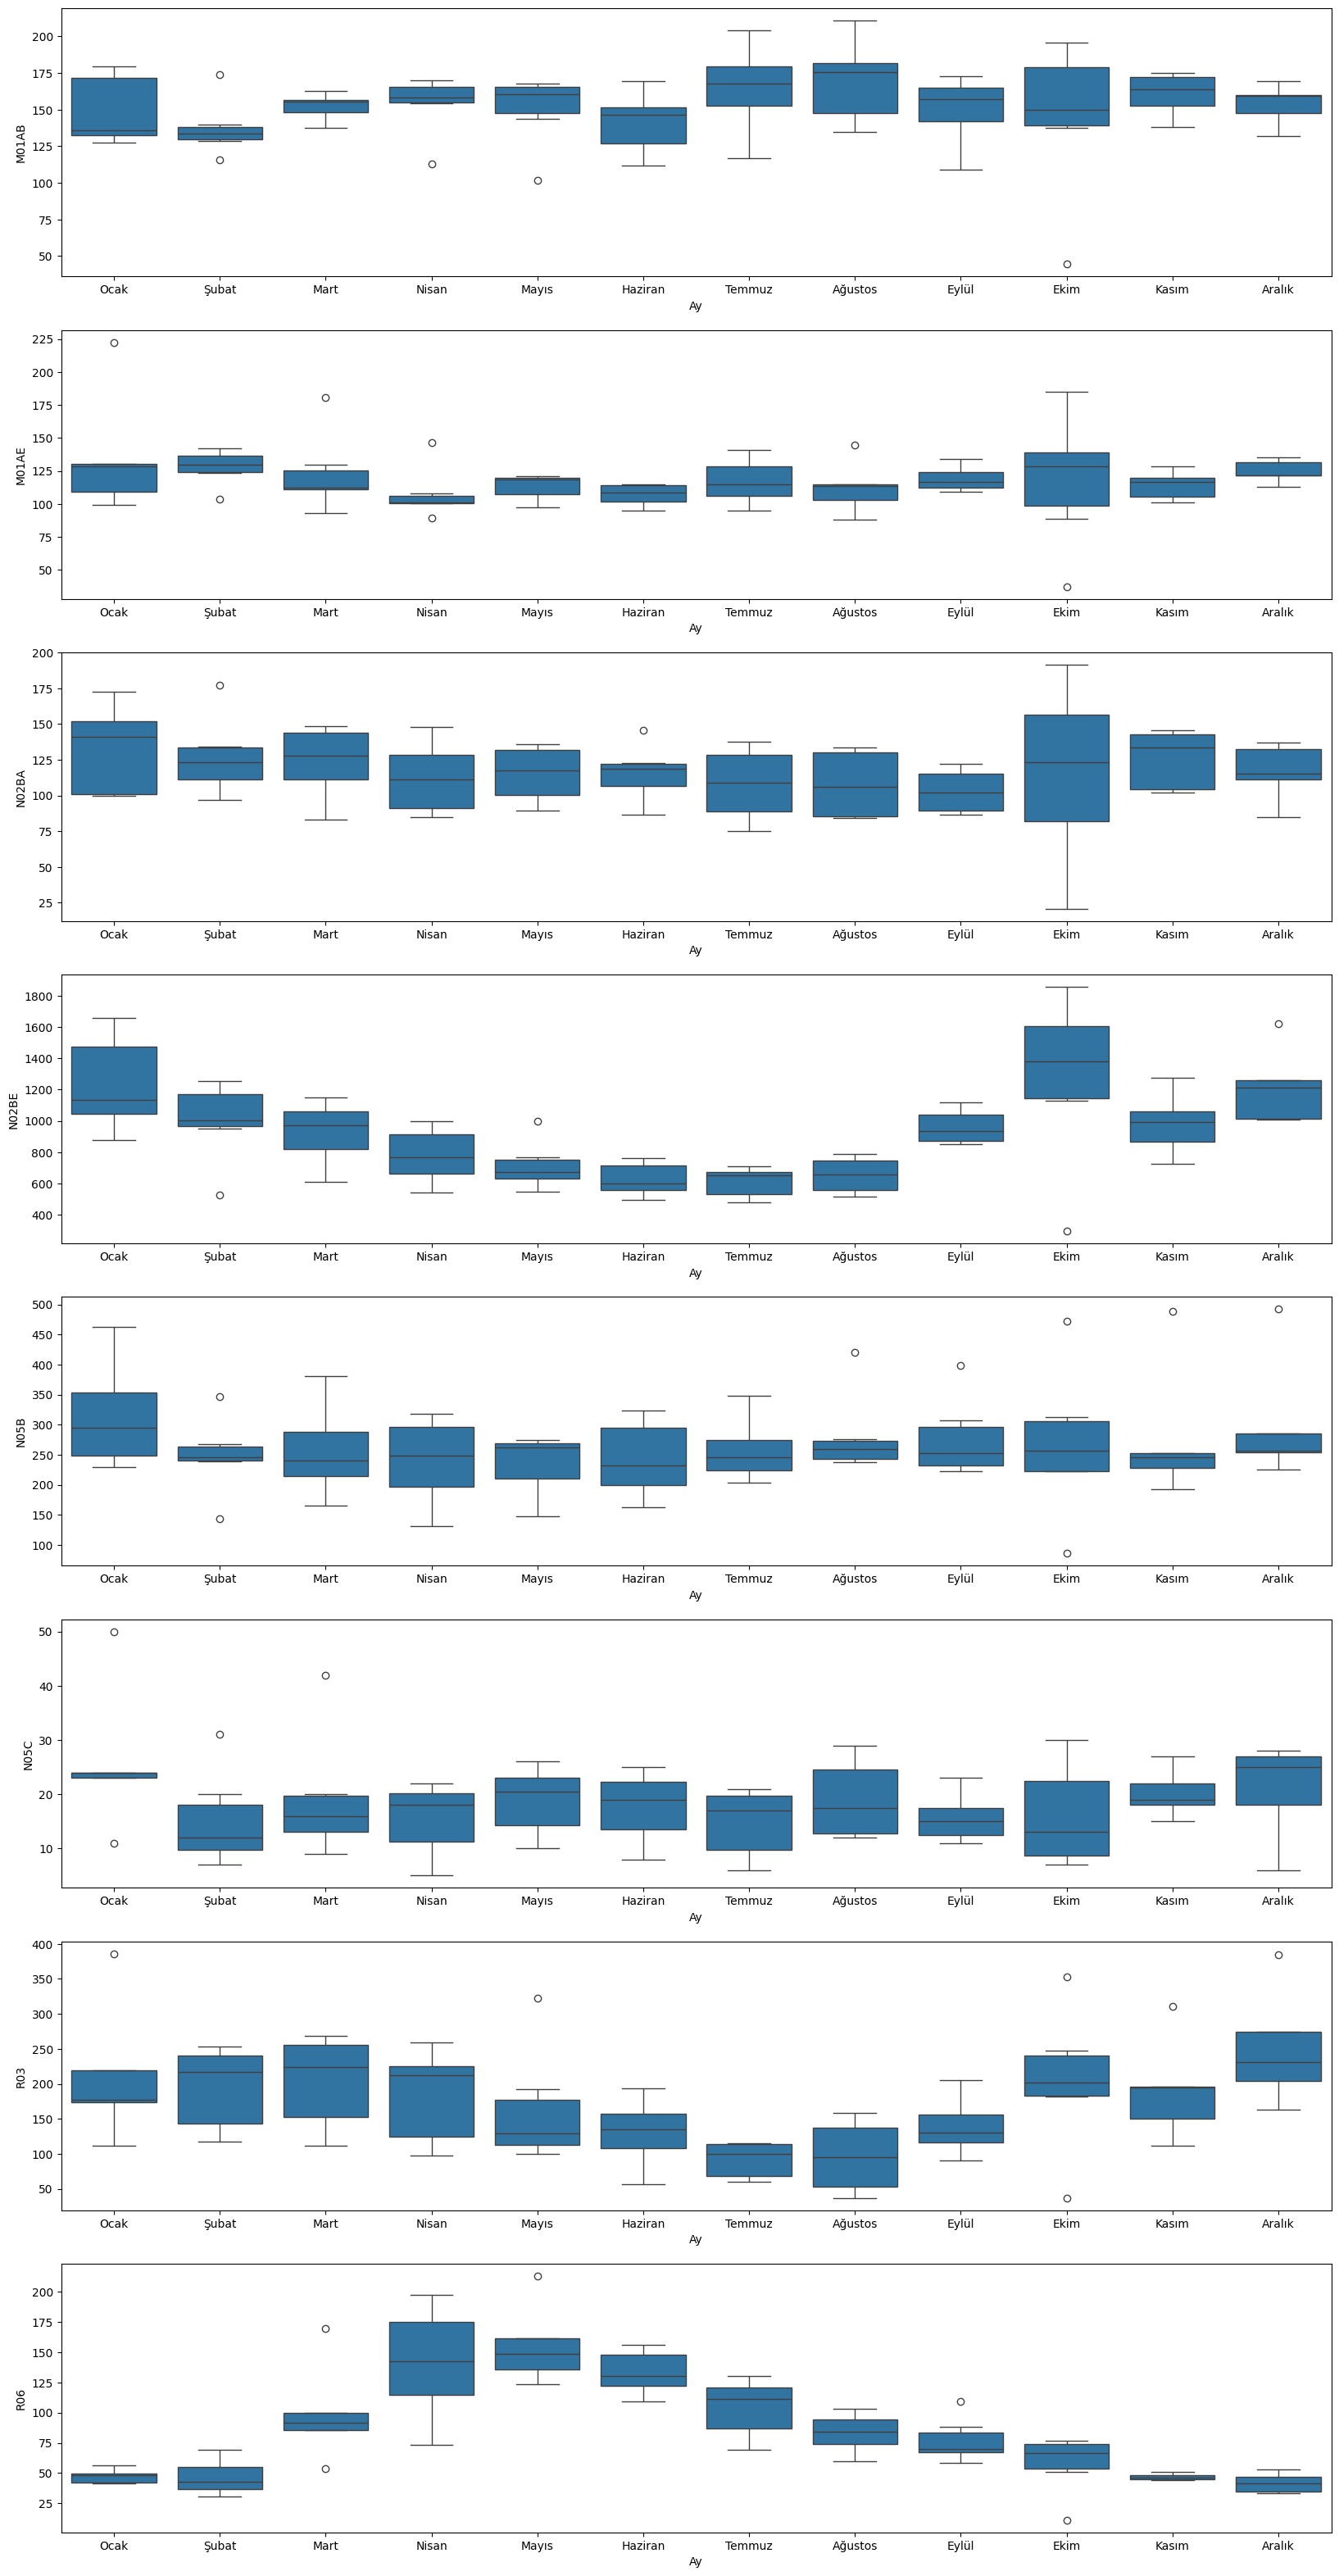

In [27]:
# Verimizi aykırı değer analizi yapmak için çizdiriyoruz.
fig, axes = plt.subplots(8, 1, figsize=(20, 40))
for name, ax in zip(['M01AB','M01AE','N02BA','N02BE', 'N05B','N05C','R03','R06'], axes):
    sns.boxplot(data=df_monthly, x="Ay", y=name, ax=ax)

In [28]:
def detect_outliers(df, features):
    outlier_indices = []

    for c in features:
        # 1st quartile
        Q1 = np.percentile(df[c],25)
        # 3rd quartile
        Q3 = np.percentile(df[c],75)
        # IQR
        IQR = Q3 - Q1
        # outlier step
        outlier_step = IQR * 2.75
        # detect outlier and their indices
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        # store indices
        outlier_indices.extend(outlier_list_col)

    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items())

    return multiple_outliers

In [29]:
df_monthly = df_monthly.drop(detect_outliers(df_monthly,kategoriler),axis=0).reset_index(drop=True)

NameError: name 'kategoriler' is not defined

<ipython-input-30-61c48a974cb5>:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.relplot(kind='line', data=df_monthly, x='Ay', y='M01AB', palette="flare", aspect=3)


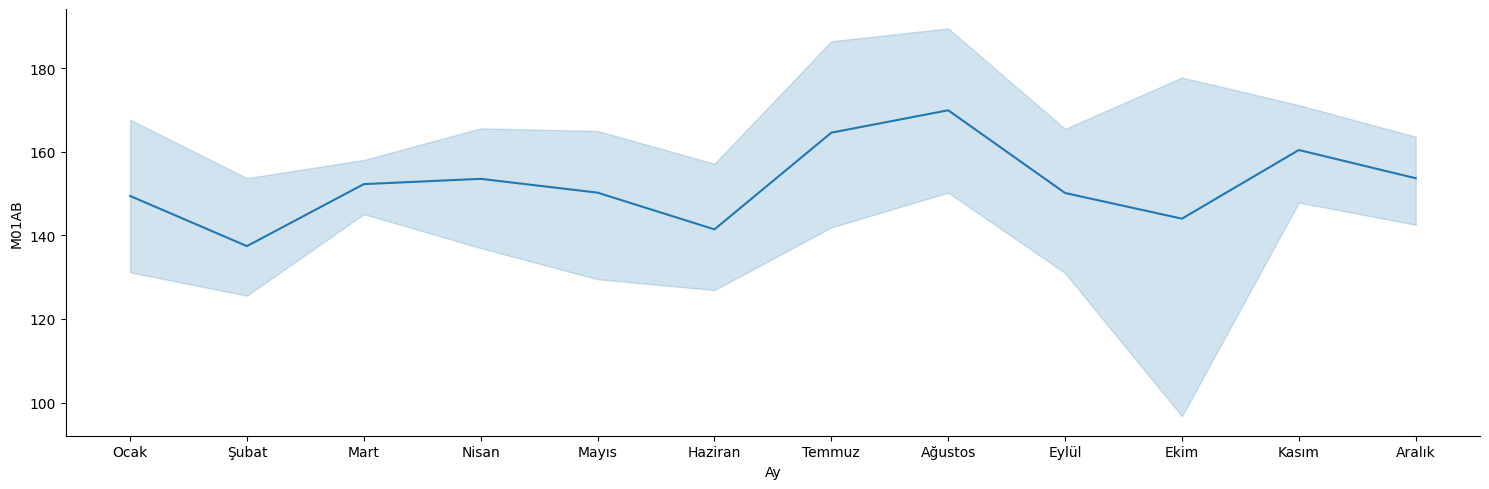

In [30]:
sns.relplot(kind='line', data=df_monthly, x='Ay', y='M01AB', palette="flare", aspect=3)